In [1]:
import pandas as pd
import numpy as np

In [2]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


#  Visualizing the Image Data

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
single_image = x_train[0]

In [6]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
single_image.shape

(28, 28)

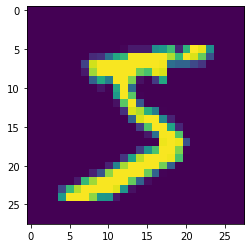

In [8]:
plt.imshow(single_image);

# PreProcessing Data

We first need to make sure the labels will be understandable by our CNN.

## One-Hot encoding the Labels

In [9]:
from tensorflow.keras.utils import to_categorical

In [10]:
y_train.shape

(60000,)

In [11]:
y_cat_test = to_categorical(y_test,10)

In [12]:
y_cat_train = to_categorical(y_train,10)

## Nomalizing X Data

In [13]:
single_image.max()

255

In [14]:
single_image.min()

0

In [15]:
x_train = x_train/255
x_test = x_test/255

In [16]:
scaled_single = x_train[0]

In [17]:
scaled_single.max()

1.0

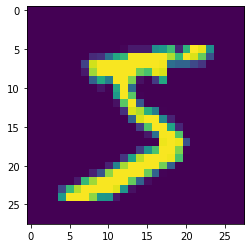

In [18]:
plt.imshow(scaled_single)

## Reshaping the Data


In [19]:
x_train.shape

(60000, 28, 28)

In [20]:
x_test.shape

(10000, 28, 28)

In [21]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [22]:
x_train.shape

(60000, 28, 28, 1)

In [23]:
x_test = x_test.reshape(10000,28,28,1)

In [24]:
x_test.shape

(10000, 28, 28, 1)

# Training the Model

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [26]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) # we can add in additional metrics https://keras.io/metrics/

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [28]:
from tensorflow.keras.callbacks import EarlyStopping

In [29]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

## Train the Model

In [30]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1387 - accuracy: 0.9589 - val_loss: 0.0559 - val_accuracy: 0.9816
Epoch 2/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0467 - accuracy: 0.9861 - val_loss: 0.0545 - val_accuracy: 0.9818
Epoch 3/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0310 - accuracy: 0.9902 - val_loss: 0.0487 - val_accuracy: 0.9829
Epoch 4/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0209 - accuracy: 0.9933 - val_loss: 0.0365 - val_accuracy: 0.9880
Epoch 5/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0143 - accuracy: 0.9954 - val_loss: 0.0402 - val_accuracy: 0.9879
Epoch 6/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0102 - accuracy: 0.9968 - val_loss: 0.0549 - val_accuracy: 0.9862


## Evaluate the Model

In [31]:
model.metrics_names

['loss', 'accuracy']

In [32]:
losses = pd.DataFrame(model.history.history)

In [33]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.138670,0.958900,0.055882,0.9816
1,0.046653,0.986050,0.054539,0.9818
2,0.030983,0.990183,0.048706,0.9829
3,0.020932,0.993300,0.036510,0.9880
4,0.014317,0.995367,0.040181,0.9879


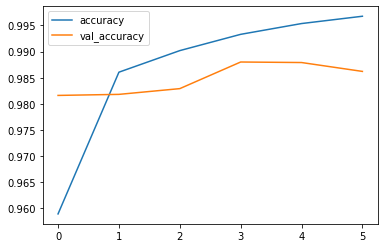

In [34]:
losses[['accuracy','val_accuracy']].plot()

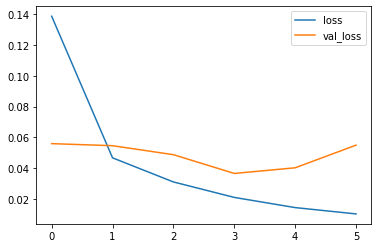

In [35]:
losses[['loss','val_loss']].plot()

In [36]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[0.05489598959684372, 0.9861999750137329]


In [37]:
from sklearn.metrics import classification_report,confusion_matrix

In [38]:
predictions = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [39]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.97      1.00      0.98      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       1.00      0.97      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.97      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [40]:
confusion_matrix(y_test,predictions)

array([[ 978,    0,    0,    1,    0,    1,    0,    0,    0,    0],
       [   0, 1131,    0,    3,    0,    0,    1,    0,    0,    0],
       [   2,    3, 1009,    6,    1,    0,    1,    4,    6,    0],
       [   0,    0,    0, 1007,    0,    2,    0,    0,    1,    0],
       [   0,    0,    0,    0,  967,    0,    5,    0,    0,   10],
       [   1,    0,    0,    8,    0,  881,    2,    0,    0,    0],
       [   5,    2,    0,    0,    1,    1,  948,    0,    1,    0],
       [   0,    4,    6,    3,    2,    0,    0,  993,    6,   14],
       [   5,    1,    0,    4,    0,    2,    1,    0,  958,    3],
       [   2,    1,    0,    6,    2,    4,    0,    0,    4,  990]])

In [41]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


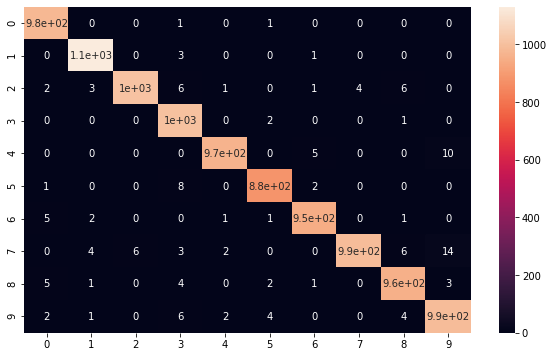

In [42]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True);